# Exercise 09 (module 11)
Hao-Tien Kuo

In [1]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('county_level_election.csv')

In [2]:
df.head()

,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,votergap,trump,clinton
0,Colorado,8117,Summit County,27239,15.173,4.918,45.996,2.5,68352,5.4,48.1,8.1,13.1,46.0,46.2,-27.632,31.530,59.162
1,Colorado,8037,Eagle County,53653,30.040,5.169,47.231,3.1,76661,10.1,47.3,9.4,11.8,31.0,47.1,-19.897,36.058,55.955
2,Idaho,16067,Minidoka County,19226,34.070,5.611,49.318,3.7,46332,24.1,11.8,18.3,34.2,80.0,61.8,54.148,71.135,16.987
3,Colorado,8113,San Miguel County,7558,10.154,4.747,46.808,3.7,59603,4.7,54.4,12.4,16.7,5.7,62.6,-44.769,23.892,68.662
4,Utah,49051,Wasatch County,21600,13.244,4.125,48.812,3.4,65207,9.5,34.4,13.9,23.0,257.8,68.3,25.357,50.471,25.114


## Bagging / Random Forest
We are going to be using test and training splits, cross validation, and fitting a random forest to the data. 

In [3]:
# Create an 80/20 Train/Test split.

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['state', 'fipscode', 'county', 'votergap', 'trump', 'clinton']).values
y = df['votergap'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
# Set the number of estimators to be 100, the features to be the square root of available features, 
# and iterate through depths (1-20). 
# Use only 5 folds for cross validation to save some compute resources. 

rfr = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', max_depth = 20, random_state = 1)
rfr.fit(X_train, y_train)
rfr.score(X_train, y_train)

0.9617578349278363

In [5]:
cross_val_score(rfr, X, y, cv=5).mean()

0.7451592857438883

In [6]:
acc_train = {}
acc_cv = {}

for i in range(20):
    rfr_i = RandomForestRegressor(n_estimators = 100, max_features = 'sqrt', max_depth = i+1, random_state = 1)
    rfr_i.fit(X_train,y_train)
    
    score_train = rfr_i.score(X_train, y_train)
    acc_train[i+1] = score_train
    
    score_CV = cross_val_score(estimator=rfr_i, X=X, y=y, cv=5)
    acc_cv[i+1] = score_CV.mean()

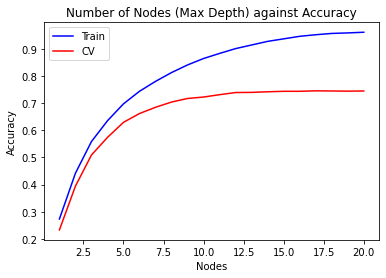

In [7]:
# Plot the max depth on the x axis and the accuracy on the y axis for training and for the mean cross validation.

plt.plot(acc_train.keys(), acc_train.values(), color='b', label='Train')
plt.plot(acc_cv.keys(), acc_cv.values(), color='r', label='CV')
plt.xlabel('Nodes')
plt.ylabel('Accuracy')
plt.title('Number of Nodes (Max Depth) against Accuracy')
plt.legend()
plt.show()

In [8]:
acc_cv

{1: 0.23269802490252217,
 2: 0.39421116643865145,
 3: 0.5088835311432461,
 4: 0.5739293148272825,
 5: 0.6295278654389952,
 6: 0.6619127209366991,
 7: 0.6850511973332558,
 8: 0.7042659236786638,
 9: 0.7174824908466639,
 10: 0.7227596941866118,
 11: 0.7314770219197809,
 12: 0.7393830231835045,
 13: 0.7399824462181785,
 14: 0.742202006831109,
 15: 0.7439022431188989,
 16: 0.7439817256638868,
 17: 0.745658617405458,
 18: 0.7451607726071579,
 19: 0.7444589115187317,
 20: 0.7451592857438883}

In [9]:
print("Max accuracy {0:.4f} at {1} nodes.".format(
    max(acc_cv.values()), 
    [i for i in acc_cv if acc_cv[i]==max(acc_cv.values())]))

Max accuracy 0.7457 at [17] nodes.


Based on the plot, how many nodes would you recommend as the max depth?

- Max accuracy is at 17 nodes. However, models with nodes above 12 all have very similar accuracy. 

What is the accuracy (mean cv) at your chosen depth?

- 0.7457

The cross validation looks different than the lab, why?

- Random forest model uses bagging, which focuses on reducing variance and thus would prevent overfitting. 

## Boosting / XGBoost

In [10]:
# Use the defaults for most parameters. Iterate through depths (1-20). 
# Use only 5 folds for cross validation to save some compute resources. 

import xgboost as xgb

xgb_regr = xgb.XGBRegressor(max_depth=20, random_state=1)
xgb_regr.fit(X_train, y_train)
xgb_regr.score(X_train, y_train)

0.9999999996481782

In [11]:
cross_val_score(xgb_regr, X, y, cv=5).mean()

0.7119758228108553

In [12]:
acc_train = {}
acc_cv = {}

for i in range(20):
    xgb_regr_i = xgb.XGBRegressor(max_depth = i+1, random_state = 1)
    xgb_regr_i.fit(X_train,y_train)
    
    score_train = xgb_regr_i.score(X_train, y_train)
    acc_train[i+1] = score_train
    
    score_CV = cross_val_score(estimator=xgb_regr_i, X=X, y=y, cv=5)
    acc_cv[i+1] = score_CV.mean()

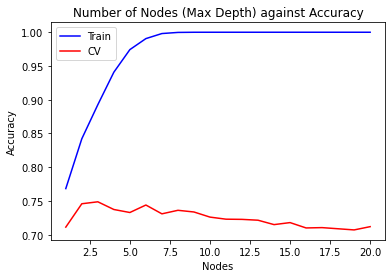

In [13]:
# Plot the max depth on the x axis and the accuracy on the y axis for training and for the mean cross validation.
    
plt.plot(acc_train.keys(), acc_train.values(), color='b', label='Train')
plt.plot(acc_cv.keys(), acc_cv.values(), color='r', label='CV')
plt.xlabel('Nodes')
plt.ylabel('Accuracy')
plt.title('Number of Nodes (Max Depth) against Accuracy')
plt.legend()
plt.show()

In [14]:
acc_cv

{1: 0.7112744915380792,
 2: 0.7458977022968002,
 3: 0.7488029395750487,
 4: 0.7373879272350942,
 5: 0.7329354325393634,
 6: 0.7440319376336519,
 7: 0.7309652590144096,
 8: 0.7361998615825635,
 9: 0.7337110929876967,
 10: 0.7261314181601547,
 11: 0.7230437003904394,
 12: 0.7227632918652613,
 13: 0.7215153582002268,
 14: 0.7149944913896935,
 15: 0.7179853706016829,
 16: 0.7100614407519468,
 17: 0.7105409735649844,
 18: 0.7088441831395411,
 19: 0.7071412578115385,
 20: 0.7119758228108553}

In [15]:
print("Max accuracy {0:.4f} at {1} nodes.".format(
    max(acc_cv.values()), 
    [i for i in acc_cv if acc_cv[i]==max(acc_cv.values())]))

Max accuracy 0.7488 at [3] nodes.


Based on the plot, how many nodes would you recommend as the max depth?

- Model with 3 nodes would have the highest accuracy.

What is the accuracy (mean cv) at your chosen depth?

- 0.7488

The cross validation looks different than random forest, why?

- Boosting focuses on bias reduction, while bagging aims to reduce variance. XGBoost can have good performance with little hyperparameter tuning.